### Case Study: Google Stock Price

### Exploring Google Stock Price

In [29]:
import pandas as pd
import numpy as np
data = pd.read_csv('GOOGL.csv',index_col=0, parse_dates=True)
stock = data['Close']

In [31]:
stock.describe()

count    3631.000000
mean      449.301397
std       300.610251
min        50.055054
25%       234.151657
50%       307.157166
75%       601.775910
max      1285.500000
Name: Close, dtype: float64

In [33]:
stock.index

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15', '2019-01-16', '2019-01-17',
               '2019-01-18', '2019-01-22'],
              dtype='datetime64[ns]', name='Date', length=3631, freq=None)

In [18]:
stock.values

array([  50.220219,   54.209209,   54.754753, ..., 1099.119995,
       1107.300049, 1078.630005])

The following command will plot the stock price

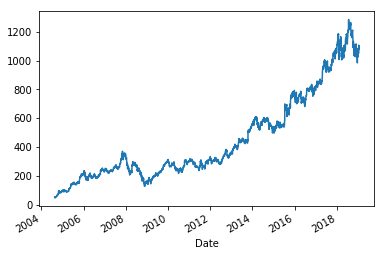

In [19]:
%matplotlib inline
stock.plot()

### Exploring a Time Series

This Series object has one entry for each trading day. The index (of type <i>datetime64</i>) is the day and the value (of type <i>float64</i>) is the closing price.

Look at the first 10 days of data

In [36]:
stock.head(10)

Date
2004-08-19    50.220219
2004-08-20    54.209209
2004-08-23    54.754753
2004-08-24    52.487488
2004-08-25    53.053055
2004-08-26    54.009010
2004-08-27    53.128128
2004-08-30    51.056057
2004-08-31    51.236237
2004-09-01    50.175175
Name: Close, dtype: float64

Look at the last 10 days of data

In [39]:
stock.tail(10)

Date
2019-01-08    1085.369995
2019-01-09    1081.650024
2019-01-10    1078.829956
2019-01-11    1064.469971
2019-01-14    1051.510010
2019-01-15    1086.510010
2019-01-16    1089.510010
2019-01-17    1099.119995
2019-01-18    1107.300049
2019-01-22    1078.630005
Name: Close, dtype: float64

In [41]:
len(stock)

3631

<b>Question 1</b><br/>What day had the largest stock price and what's the price? 

In [44]:
stock.nlargest(1)

Date
2018-07-26    1285.5
Name: Close, dtype: float64

<b>Question 2</b><br/>What are the 10 days with largest stock price? Report both the day and the price.

In [47]:
stock.nlargest(10)

Date
2018-07-26    1285.500000
2018-07-25    1275.939941
2018-08-29    1264.650024
2018-08-09    1264.459961
2018-08-08    1261.329956
2018-07-24    1258.150024
2018-08-14    1258.140015
2018-08-27    1256.270020
2018-08-07    1255.839966
2018-08-30    1254.439941
Name: Close, dtype: float64

<b>Question 3</b><br/>How much profit (%) would we have made if we had bought at the beginning and sold everything on the last day? Do not type in any date.

In [50]:
((stock.values[-1] - stock.values[0]) / stock.values[0]) * 100

2047.800281396622

<b>Question 4</b><br/>
What is the moving average of the price at each trading session? Use a 50-trading-days window. <i>Hint</i>: Explore the method <i>rolling</i>

In [53]:
rol = stock.rolling(50)

In [55]:
type(rol)

pandas.core.window.rolling.Rolling

In [59]:
stock[:50].mean()

63.58698696

In [61]:
rol.mean()

Date
2004-08-19            NaN
2004-08-20            NaN
2004-08-23            NaN
2004-08-24            NaN
2004-08-25            NaN
                 ...     
2019-01-15    1059.714397
2019-01-16    1059.784998
2019-01-17    1060.337598
2019-01-18    1061.368999
2019-01-22    1061.550200
Name: Close, Length: 3631, dtype: float64

Set maximum display row to 100

In [64]:
pd.set_option('display.max_rows',100)

In [66]:
rol.mean()

Date
2004-08-19            NaN
2004-08-20            NaN
2004-08-23            NaN
2004-08-24            NaN
2004-08-25            NaN
                 ...     
2019-01-15    1059.714397
2019-01-16    1059.784998
2019-01-17    1060.337598
2019-01-18    1061.368999
2019-01-22    1061.550200
Name: Close, Length: 3631, dtype: float64

<b>Question 5</b><br/>
Consider this investment strategy: buy on day x and then sell after 5 days (on day x+5). Find the expected profit (in %) of this operation. <i>Hint</i>: explore the method <i>shift</i>

In [69]:
stock.head(6)

Date
2004-08-19    50.220219
2004-08-20    54.209209
2004-08-23    54.754753
2004-08-24    52.487488
2004-08-25    53.053055
2004-08-26    54.009010
Name: Close, dtype: float64

Shift stock by -1 day

In [72]:
stock.shift(-1).head()

Date
2004-08-19    54.209209
2004-08-20    54.754753
2004-08-23    52.487488
2004-08-24    53.053055
2004-08-25    54.009010
Name: Close, dtype: float64

Future prices if sold after 5 days

In [75]:
futurePrices = stock.shift(-5)

Compute profits for all days

In [78]:
profits = (futurePrices - stock) / stock

Average profit

In [81]:
profits.mean()

0.005094049184215537

<b>Question 6</b><br/>
Consider this investment strategy: buy whenever the price goes above the 20-day moving average, and then sell after 5 trading sessions. How much profit (in %) would we make on average?

20-day moving average

In [85]:
movavg = stock.rolling(20).mean()

profit if selling after 5 trading sessions

In [88]:
profit = (stock.shift(-5) - stock) / stock

average profit if selling after 5 trading sessions on days when the price goe above the 20-day moving average

In [91]:
profit[stock > movavg].mean()

0.005450475484188758

### Correlation between Google Stock  Price and Santa Clara Housing Price

The following code loads and cleans the data set <i>santaclara_sfh.csv</i>, which you should copy into the same folder as this Jupyter notebook.

In [51]:
df = pd.read_csv('santaclara_sfh.csv')
# make the date column of type datetime
df['date'] = pd.to_datetime(df.date)
# make the price column of type float
df['median_sfh_price_past_3_months'] = df.median_sfh_price_past_3_months + 0.0 
# make date the index 
df.set_index('date',inplace=True) 
# take the series of median prices
housing = df['median_sfh_price_past_3_months']
housing.name = 'housing'

Let's take a look at the oldest prices

In [54]:
housing.head()

date
2012-01-31    485000.0
2012-02-29    528000.0
2012-03-31    568000.0
2012-04-30    620000.0
2012-05-31    630000.0
Name: housing, dtype: float64

Remember that each price is the median over the previous three months. So, for example, the median sale price in the period from 2012-02-01 to 2012-04-30 was $620,000. Let's plot it.

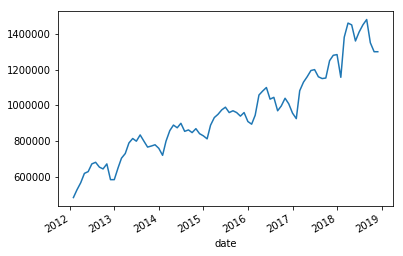

In [55]:
housing.plot()

### Are housing prices correlated to stock prices?

<p>To anwer this question, we first need to align the two Series. The Series <i>housing</i> has one entry for each ending day of each month and a value that is the 3-month moving average; the series <i>stock</i> has one entry for each <b>trading day</b> and the value that is the closing price. </p>
<p>To align the two Series, we will create a new Series of stock prices that has only one entry for every month-end-day and reports the 3-month moving median price of the stock</p>

#### Step #1: Pad stock so that there are no missing days (currently, holidays are missing)

In [74]:
padded = stock.asfreq('D', method='bfill')

#### Step #2: Compute the 90-day moving median of stock

In [75]:
padded.rolling(90).median()

Date
2004-08-19            NaN
2004-08-20            NaN
2004-08-21            NaN
2004-08-22            NaN
2004-08-23            NaN
2004-08-24            NaN
2004-08-25            NaN
2004-08-26            NaN
2004-08-27            NaN
2004-08-28            NaN
2004-08-29            NaN
2004-08-30            NaN
2004-08-31            NaN
2004-09-01            NaN
2004-09-02            NaN
2004-09-03            NaN
2004-09-04            NaN
2004-09-05            NaN
2004-09-06            NaN
2004-09-07            NaN
2004-09-08            NaN
2004-09-09            NaN
2004-09-10            NaN
2004-09-11            NaN
2004-09-12            NaN
2004-09-13            NaN
2004-09-14            NaN
2004-09-15            NaN
2004-09-16            NaN
2004-09-17            NaN
2004-09-18            NaN
2004-09-19            NaN
2004-09-20            NaN
2004-09-21            NaN
2004-09-22            NaN
2004-09-23            NaN
2004-09-24            NaN
2004-09-25            NaN
2004-09

#### Step #3: Retain the same days as in the housing Series

In [79]:
retained = padded[housing.index]

### Compute correlation

Are stock and housing prices correlated?

In [80]:
retained.corr(housing)

0.9488394827150503